In [6]:
#Importamos las librerías de costumbre
import numpy as np
import pandas as pd
#Instalamos la librería que nos va a permitir bajar de drive
!pip install gdown
import gdown
#Colocamos la URL del archivo
url = 'https://drive.google.com/uc?id=1tY5Nkrr7mEvkXjrlWPHyzx9DoDZhSD2l'
#Colocamos el nombre al archivo donde la información será guardada
Nombre = 'Vehiculos.rar'
#Lo descargamos
gdown.download(url,Nombre,quiet=False)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=f136a486d1806616d24a42c28c5baa059925d79cbc574a2616e326a716a5cc20
  Stored in directory: /home/slbejaranom/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
Successfully built gdown
^C
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'gdown'

In [1]:
#Una vez descargado lo extraemos, para eso hacemos uso de las librerías patool y pyunpack
!pip install patool pyunpack
from pyunpack import Archive

#Extraemos
Archive('Vehiculos.rar').extractall('.')
print("Extraído satisfactoriamente")

     |████████████████████████████████| 77 kB 5.4 MB/s  eta 0:00:01


ValueError: archive file does not exist:/home/slbejaranom/work/home/ConteoEIdentificacionDeTrafico/Convolucional/Vehiculos.rar

In [1]:
#Importamos tensorflow y Keras, primero instalamos tensorflow-gpu en caso de que no esté
import tensorflow as tf
from tensorflow import keras

In [2]:
#Ahora crearemos los train generator para cada clase
#Ahora normalizamos los canales de RGB de entrenamiento
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.3)

#Creamos el generador de imágenes de entrenamiento cuyo tamaño será de 200x200 y estará en batches de 32 con 2 clases
train_generator = train_datagen.flow_from_directory(
    directory='../Datasets/Vehiculos',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory='../Datasets/Vehiculos', # same directory as training data
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    subset='validation') # set as validation data


Found 5128 images belonging to 2 classes.
Found 2197 images belonging to 2 classes.


In [3]:
#Creamos el modelo para entrenarlo repetidas veces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
history = []
best_val_history = []
for i in range(1,101):
    modelo = Sequential()
    modelo.add(Conv2D(32,(7,7),input_shape=(200,200,3),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(MaxPooling2D(pool_size=(2,2)))
    modelo.add(Flatten())
    modelo.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('V_NoV/Arquitectura6_LR_0_0001/arq6_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])
    history.append(modelo.fit(train_generator,epochs=100,callbacks=[mcp_save],validation_data=validation_generator))        
    del modelo

Epoch 1/100
257/257 [==============================] - 6s 22ms/step - loss: 0.8047 - acc: 0.5829 - val_loss: 0.6312 - val_acc: 0.6768
Epoch 2/100
257/257 [==============================] - 4s 15ms/step - loss: 0.5514 - acc: 0.7457 - val_loss: 0.5533 - val_acc: 0.7283
Epoch 3/100
257/257 [==============================] - 4s 15ms/step - loss: 0.4853 - acc: 0.7882 - val_loss: 0.5143 - val_acc: 0.7538
Epoch 4/100
257/257 [==============================] - 4s 15ms/step - loss: 0.4471 - acc: 0.8151 - val_loss: 0.4809 - val_acc: 0.7756
Epoch 5/100
257/257 [==============================] - 4s 15ms/step - loss: 0.4136 - acc: 0.8354 - val_loss: 0.4580 - val_acc: 0.7815
Epoch 6/100
257/257 [==============================] - 4s 15ms/step - loss: 0.3938 - acc: 0.8457 - val_loss: 0.4401 - val_acc: 0.7906
Epoch 7/100
257/257 [==============================] - 4s 15ms/step - loss: 0.3771 - acc: 0.8547 - val_loss: 0.4240 - val_acc: 0.8011
Epoch 8/100
257/257 [==============================] - 4s 15ms

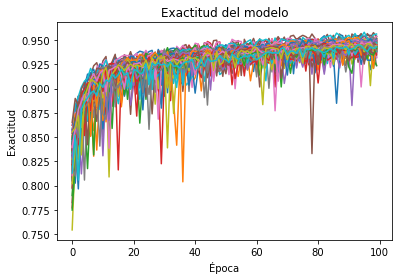

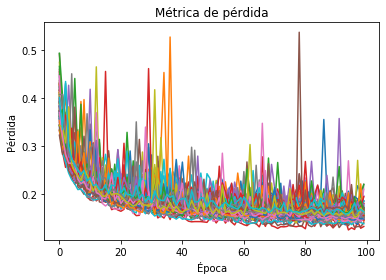

In [5]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [5]:
from tensorflow.keras.models import load_model
best_val_history = []
for i in range(1,95):
    modelo = load_model('V_NoV/Arquitectura6_LR_0_0001/arq6_'+str(i)+'.hdf5')
    best_val_history.append(modelo.evaluate(validation_generator))
    del modelo

TypeError: ('Keyword argument not understood:', 'groups')

In [5]:
prom_loss = 0.0;
prom_acc = 0.0;
for i in range(len(best_val_history)):
    prom_loss = prom_loss + best_val_history[i][0]
    prom_acc = prom_acc + best_val_history[i][1]

prom_loss = prom_loss / len(best_val_history)
prom_acc = prom_acc / len(best_val_history)

print(prom_loss)
print(prom_acc)

0.20908499350573154
0.9167481781320369


In [1]:
#Para liberar la memoria del GPU
from numba import cuda
cuda.select_device(0)
cuda.close()

CudaAPIError: [2] Call to cuDevicePrimaryCtxRetain results in CUDA_ERROR_OUT_OF_MEMORY